# Use machine learning to predict passenger survival from shipwreck
## a) (10 pts.) Use the train set to answer true or false to each of the following
• More than 75% passengers did not travel with parents or children\
• 30 to 33% of passengers had siblings and/or spouse aboard\
• Less than 1% of passengers paid a fare as high as 500 dollars\
• Less than 1% of passengers are 65+ years old

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df[train_df['Parch']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
678/891

0.7609427609427609

True,More than 75%(about 76%) of passengers did not travel with parents or children.

In [6]:
train_df[train_df['SibSp']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
1-608/891

0.3176206509539843

 True,about 31% of passengers had siblings and/or spouse aboard.

In [8]:
train_df[train_df['Fare']>=500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [9]:
3/891

0.003367003367003367

True,it is 0.3% so less than 1% of passengers paid a fare as high as 500 dollars.

In [10]:
(train_df[train_df['Age']>65]).shape

(8, 12)

In [80]:
age=train_df['Age'].dropna()
age.count

<bound method Series.count of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64>

In [81]:
8/714

0.011204481792717087

False,more than than 1% of passengers are 65+ years old.

## b) (20 pts.) Fill NAs values as follows
• Drop columns PassengerID, Name, Ticket, Cabin.\
• Fill NAs values in Embark with the most common category\
• Fill NAs values in Fare with the median value in that column\
• Fill NAs values in Age with the median value in each of Pclass x Gender combination

In [12]:
#Drop columns PassengerID, Name, Ticket, Cabin.
train=train_df.copy()
train1=train.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)
train1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
#Fill NAs values in Embark with the most common category
train1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train1[train1['Embarked']=='S']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S


In [15]:
train1['Embarked'].fillna(value='S',inplace=True)

In [16]:
train1[train1['Embarked']=='S']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S


In [17]:
train1['Fare'].fillna(train1['Fare'].median(),inplace=True)

In [18]:
# Fill NAs values in Age with the median value in each of Pclass x Gender combination

by_sex_class = train1.groupby(['Sex', 'Pclass'])
def impute_median(series):
    return series.fillna(series.median())
train1['Age'] = by_sex_class['Age'].transform(impute_median)

In [19]:
#Do the same thing for test file
test_df = pd.read_csv('test.csv')
test1=test_df.copy()
test1=test1.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)
test1['Embarked'].value_counts()


S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [20]:
test1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [21]:
test1['Embarked'].fillna(value='S',inplace=True)


In [22]:
test1['Fare'].fillna(test1['Fare'].median(),inplace=True)
by_sex_class = test1.groupby(['Sex', 'Pclass'])
def impute_median(series):
    return series.fillna(series.median())
test1['Age'] = by_sex_class['Age'].transform(impute_median)

## c) (20 pts.) Perform the following Data cleaning and Feature Engineering steps for both the train and test files.
• Split column Age into 5 intervals (0, 16, 32, 48, 64, 100) (now categorical)\
• Split column Fare into 4 intervals (0, 7.9, 14.5, 31, 600) (now categorical)\
• Create column Size by adding values from columns SibSp, Parch, then drop them keeping
the created column.\
• Create binary column Alone with value 1 (if passenger travels alone) and 0 otherwise.

In [23]:
train1.loc[(train1.Age > 0) & (train1.Age <= 16), 'Age'] = 1
train1.loc[(train1.Age > 16) & (train1.Age <= 32), 'Age'] = 2
train1.loc[(train1.Age > 32) & (train1.Age <= 48), 'Age'] = 3
train1.loc[(train1.Age > 48) & (train1.Age <= 64), 'Age'] = 4
train1.loc[(train1.Age > 64) & (train1.Age <= 100), 'Age'] = 5
train1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,2.0,1,0,7.2500,S
1,1,1,female,3.0,1,0,71.2833,C
2,1,3,female,2.0,0,0,7.9250,S
3,1,1,female,3.0,1,0,53.1000,S
4,0,3,male,3.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,2.0,0,0,13.0000,S
887,1,1,female,2.0,0,0,30.0000,S
888,0,3,female,2.0,1,2,23.4500,S
889,1,1,male,2.0,0,0,30.0000,C


In [24]:
test1.loc[(test1.Age > 0) & (test1.Age <= 16), 'Age'] = 1
test1.loc[(test1.Age > 16) & (test1.Age <= 32), 'Age'] = 2
test1.loc[(test1.Age > 32) & (test1.Age <= 48), 'Age'] = 3
test1.loc[(test1.Age > 48) & (test1.Age <= 64), 'Age'] = 4
test1.loc[(test1.Age > 64) & (test1.Age <= 100), 'Age'] = 5
test1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,3.0,0,0,7.8292,Q
1,3,female,3.0,1,0,7.0000,S
2,2,male,4.0,0,0,9.6875,Q
3,3,male,2.0,0,0,8.6625,S
4,3,female,2.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,2.0,0,0,8.0500,S
414,1,female,3.0,0,0,108.9000,C
415,3,male,3.0,0,0,7.2500,S
416,3,male,2.0,0,0,8.0500,S


In [25]:
train1.loc[(train1.Fare > 0) & (train1.Fare <= 7.9), 'Fare'] = 1
train1.loc[(train1.Fare > 7.9) & (train1.Fare <= 14.5), 'Fare'] = 2
train1.loc[(train1.Fare > 14.5) & (train1.Fare <= 31), 'Fare'] = 3
train1.loc[(train1.Fare > 31) & (train1.Fare <= 600), 'Fare'] = 4
train1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,2.0,1,0,1.0,S
1,1,1,female,3.0,1,0,4.0,C
2,1,3,female,2.0,0,0,2.0,S
3,1,1,female,3.0,1,0,4.0,S
4,0,3,male,3.0,0,0,2.0,S
...,...,...,...,...,...,...,...,...
886,0,2,male,2.0,0,0,2.0,S
887,1,1,female,2.0,0,0,3.0,S
888,0,3,female,2.0,1,2,3.0,S
889,1,1,male,2.0,0,0,3.0,C


In [26]:
test1.loc[(test1.Fare > 0) & (test1.Fare <= 7.9), 'Fare'] = 1
test1.loc[(test1.Fare > 7.9) & (test1.Fare <= 14.5), 'Fare'] = 2
test1.loc[(test1.Fare > 14.5) & (test1.Fare <= 31), 'Fare'] = 3
test1.loc[(test1.Fare > 31) & (test1.Fare <= 600), 'Fare'] = 4
test1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,3.0,0,0,1.0,Q
1,3,female,3.0,1,0,1.0,S
2,2,male,4.0,0,0,2.0,Q
3,3,male,2.0,0,0,2.0,S
4,3,female,2.0,1,1,2.0,S
...,...,...,...,...,...,...,...
413,3,male,2.0,0,0,2.0,S
414,1,female,3.0,0,0,4.0,C
415,3,male,3.0,0,0,1.0,S
416,3,male,2.0,0,0,2.0,S


In [27]:
#Create column Size by adding values from columns SibSp, Parch, then drop them keeping the created column.
train1['Size']=train1['SibSp']+train1['Parch']
train1=train1.drop(['SibSp','Parch'],axis=1)
train1

,Survived,Pclass,Sex,Age,Fare,Embarked,Size
0,0,3,male,2.0,1.0,S,1
1,1,1,female,3.0,4.0,C,1
2,1,3,female,2.0,2.0,S,0
3,1,1,female,3.0,4.0,S,1
4,0,3,male,3.0,2.0,S,0
...,...,...,...,...,...,...,...
886,0,2,male,2.0,2.0,S,0
887,1,1,female,2.0,3.0,S,0
888,0,3,female,2.0,3.0,S,3
889,1,1,male,2.0,3.0,C,0


In [28]:
test1['Size']=test1['SibSp']+test1['Parch']
test1=test1.drop(['SibSp','Parch'],axis=1)
test1

,Pclass,Sex,Age,Fare,Embarked,Size
0,3,male,3.0,1.0,Q,0
1,3,female,3.0,1.0,S,1
2,2,male,4.0,2.0,Q,0
3,3,male,2.0,2.0,S,0
4,3,female,2.0,2.0,S,2
...,...,...,...,...,...,...
413,3,male,2.0,2.0,S,0
414,1,female,3.0,4.0,C,0
415,3,male,3.0,1.0,S,0
416,3,male,2.0,2.0,S,0


In [29]:
train1['Alone'] = [1 if x == 0 else 0 for x in train1['Size']]
train1

,Survived,Pclass,Sex,Age,Fare,Embarked,Size,Alone
0,0,3,male,2.0,1.0,S,1,0
1,1,1,female,3.0,4.0,C,1,0
2,1,3,female,2.0,2.0,S,0,1
3,1,1,female,3.0,4.0,S,1,0
4,0,3,male,3.0,2.0,S,0,1
...,...,...,...,...,...,...,...,...
886,0,2,male,2.0,2.0,S,0,1
887,1,1,female,2.0,3.0,S,0,1
888,0,3,female,2.0,3.0,S,3,0
889,1,1,male,2.0,3.0,C,0,1


In [30]:
train1['Alone']=pd.get_dummies(train1['Alone'],drop_first=True)

In [31]:
test1['Alone'] = [1 if x == 0 else 0 for x in test1['Size']]
test1

,Pclass,Sex,Age,Fare,Embarked,Size,Alone
0,3,male,3.0,1.0,Q,0,1
1,3,female,3.0,1.0,S,1,0
2,2,male,4.0,2.0,Q,0,1
3,3,male,2.0,2.0,S,0,1
4,3,female,2.0,2.0,S,2,0
...,...,...,...,...,...,...,...
413,3,male,2.0,2.0,S,0,1
414,1,female,3.0,4.0,C,0,1
415,3,male,3.0,1.0,S,0,1
416,3,male,2.0,2.0,S,0,1


In [32]:
test1['Alone']=pd.get_dummies(test1['Alone'],drop_first=True)

In [33]:
test1.dtypes

Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
Size          int64
Alone         uint8
dtype: object

In [34]:
train1 = pd.get_dummies(train1, columns = ['Sex','Embarked'],
                    drop_first = True)
train1



,Survived,Pclass,Age,Fare,Size,Alone,Sex_male,Embarked_Q,Embarked_S
0,0,3,2.0,1.0,1,0,1,0,1
1,1,1,3.0,4.0,1,0,0,0,0
2,1,3,2.0,2.0,0,1,0,0,1
3,1,1,3.0,4.0,1,0,0,0,1
4,0,3,3.0,2.0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,2.0,2.0,0,1,1,0,1
887,1,1,2.0,3.0,0,1,0,0,1
888,0,3,2.0,3.0,3,0,0,0,1
889,1,1,2.0,3.0,0,1,1,0,0


In [35]:
test1 = pd.get_dummies(test1, columns = ['Sex','Embarked'],
                    drop_first = True)
test1

,Pclass,Age,Fare,Size,Alone,Sex_male,Embarked_Q,Embarked_S
0,3,3.0,1.0,0,1,1,1,0
1,3,3.0,1.0,1,0,0,0,1
2,2,4.0,2.0,0,1,1,1,0
3,3,2.0,2.0,0,1,1,0,1
4,3,2.0,2.0,2,0,0,0,1
...,...,...,...,...,...,...,...,...
413,3,2.0,2.0,0,1,1,0,1
414,1,3.0,4.0,0,1,0,0,0
415,3,3.0,1.0,0,1,1,0,1
416,3,2.0,2.0,0,1,1,0,1


## d) (40 pts.) The test.csv file from kaggle does not include Survived. So split the train set into new train and test subsets. Use the train subset to fit the following models.
• KNN\
• Support Vector Classifier\
• Logistic Regression\
• Random Forest\
• Gradient Boosting\
Use GridSearchCV to find best hyperparameter values. Report the test accuracy rate (using
the test subset). Try to improve the test accuracy rate (include polynomial and/or interaction
terms or use other machine/satistical method or any other mean).

In [36]:
Y=train1.Survived

In [37]:
#add polynomial features on Pclass,Age,Fare and Size to train dataset
from sklearn.preprocessing import PolynomialFeatures

In [38]:
df_poly = train1.iloc[:,[1,2,3,4]]
df_poly

,Pclass,Age,Fare,Size
0,3,2.0,1.0,1
1,1,3.0,4.0,1
2,3,2.0,2.0,0
3,1,3.0,4.0,1
4,3,3.0,2.0,0
...,...,...,...,...
886,2,2.0,2.0,0
887,1,2.0,3.0,0
888,3,2.0,3.0,3
889,1,2.0,3.0,0


In [39]:
df_keep=train1.iloc[:,[5,6,7,8]]
df_keep

,Alone,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,1
1,0,0,0,0
2,1,0,0,1
3,0,0,0,1
4,1,1,0,1
...,...,...,...,...
886,1,1,0,1
887,1,0,0,1
888,0,0,0,1
889,1,1,0,0


In [40]:
poly = PolynomialFeatures(include_bias = True)
X = poly.fit_transform(df_poly)
poly.get_feature_names(df_poly.columns)

['1',
 'Pclass',
 'Age',
 'Fare',
 'Size',
 'Pclass^2',
 'Pclass Age',
 'Pclass Fare',
 'Pclass Size',
 'Age^2',
 'Age Fare',
 'Age Size',
 'Fare^2',
 'Fare Size',
 'Size^2']

In [41]:
X2 = pd.DataFrame(X, columns = poly.get_feature_names(df_poly.columns))
X2

,1,Pclass,Age,Fare,Size,Pclass^2,Pclass Age,Pclass Fare,Pclass Size,Age^2,Age Fare,Age Size,Fare^2,Fare Size,Size^2
0,1.0,3.0,2.0,1.0,1.0,9.0,6.0,3.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0
1,1.0,1.0,3.0,4.0,1.0,1.0,3.0,4.0,1.0,9.0,12.0,3.0,16.0,4.0,1.0
2,1.0,3.0,2.0,2.0,0.0,9.0,6.0,6.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0
3,1.0,1.0,3.0,4.0,1.0,1.0,3.0,4.0,1.0,9.0,12.0,3.0,16.0,4.0,1.0
4,1.0,3.0,3.0,2.0,0.0,9.0,9.0,6.0,0.0,9.0,6.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,2.0,2.0,2.0,0.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0
887,1.0,1.0,2.0,3.0,0.0,1.0,2.0,3.0,0.0,4.0,6.0,0.0,9.0,0.0,0.0
888,1.0,3.0,2.0,3.0,3.0,9.0,6.0,9.0,9.0,4.0,6.0,6.0,9.0,9.0,9.0
889,1.0,1.0,2.0,3.0,0.0,1.0,2.0,3.0,0.0,4.0,6.0,0.0,9.0,0.0,0.0


In [42]:
train1=pd.concat([X2,df_keep],axis = 1)
train1

,1,Pclass,Age,Fare,Size,Pclass^2,Pclass Age,Pclass Fare,Pclass Size,Age^2,Age Fare,Age Size,Fare^2,Fare Size,Size^2,Alone,Sex_male,Embarked_Q,Embarked_S
0,1.0,3.0,2.0,1.0,1.0,9.0,6.0,3.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,0,1,0,1
1,1.0,1.0,3.0,4.0,1.0,1.0,3.0,4.0,1.0,9.0,12.0,3.0,16.0,4.0,1.0,0,0,0,0
2,1.0,3.0,2.0,2.0,0.0,9.0,6.0,6.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,1,0,0,1
3,1.0,1.0,3.0,4.0,1.0,1.0,3.0,4.0,1.0,9.0,12.0,3.0,16.0,4.0,1.0,0,0,0,1
4,1.0,3.0,3.0,2.0,0.0,9.0,9.0,6.0,0.0,9.0,6.0,0.0,4.0,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,2.0,2.0,2.0,0.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,1,1,0,1
887,1.0,1.0,2.0,3.0,0.0,1.0,2.0,3.0,0.0,4.0,6.0,0.0,9.0,0.0,0.0,1,0,0,1
888,1.0,3.0,2.0,3.0,3.0,9.0,6.0,9.0,9.0,4.0,6.0,6.0,9.0,9.0,9.0,0,0,0,1
889,1.0,1.0,2.0,3.0,0.0,1.0,2.0,3.0,0.0,4.0,6.0,0.0,9.0,0.0,0.0,1,1,0,0


In [43]:
#adding polynomial features on Pclass,Age,Fare and size to test dataset
df_poly1 = test1.iloc[:,[0,1,2,3]]
df_poly1

,Pclass,Age,Fare,Size
0,3,3.0,1.0,0
1,3,3.0,1.0,1
2,2,4.0,2.0,0
3,3,2.0,2.0,0
4,3,2.0,2.0,2
...,...,...,...,...
413,3,2.0,2.0,0
414,1,3.0,4.0,0
415,3,3.0,1.0,0
416,3,2.0,2.0,0


In [44]:
df_keep1 = test1.iloc[:,[4,5,6,7]]
df_keep1

,Alone,Sex_male,Embarked_Q,Embarked_S
0,1,1,1,0
1,0,0,0,1
2,1,1,1,0
3,1,1,0,1
4,0,0,0,1
...,...,...,...,...
413,1,1,0,1
414,1,0,0,0
415,1,1,0,1
416,1,1,0,1


In [45]:
poly = PolynomialFeatures(include_bias = True)
X3 = poly.fit_transform(df_poly1)
poly.get_feature_names(df_poly1.columns)

['1',
 'Pclass',
 'Age',
 'Fare',
 'Size',
 'Pclass^2',
 'Pclass Age',
 'Pclass Fare',
 'Pclass Size',
 'Age^2',
 'Age Fare',
 'Age Size',
 'Fare^2',
 'Fare Size',
 'Size^2']

In [46]:
X4 = pd.DataFrame(X3, columns = poly.get_feature_names(df_poly1.columns))
X4

,1,Pclass,Age,Fare,Size,Pclass^2,Pclass Age,Pclass Fare,Pclass Size,Age^2,Age Fare,Age Size,Fare^2,Fare Size,Size^2
0,1.0,3.0,3.0,1.0,0.0,9.0,9.0,3.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0
1,1.0,3.0,3.0,1.0,1.0,9.0,9.0,3.0,3.0,9.0,3.0,3.0,1.0,1.0,1.0
2,1.0,2.0,4.0,2.0,0.0,4.0,8.0,4.0,0.0,16.0,8.0,0.0,4.0,0.0,0.0
3,1.0,3.0,2.0,2.0,0.0,9.0,6.0,6.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0
4,1.0,3.0,2.0,2.0,2.0,9.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,3.0,2.0,2.0,0.0,9.0,6.0,6.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0
414,1.0,1.0,3.0,4.0,0.0,1.0,3.0,4.0,0.0,9.0,12.0,0.0,16.0,0.0,0.0
415,1.0,3.0,3.0,1.0,0.0,9.0,9.0,3.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0
416,1.0,3.0,2.0,2.0,0.0,9.0,6.0,6.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0


In [47]:
test1 = pd.concat([X4,df_keep1],axis = 1)
test1

,1,Pclass,Age,Fare,Size,Pclass^2,Pclass Age,Pclass Fare,Pclass Size,Age^2,Age Fare,Age Size,Fare^2,Fare Size,Size^2,Alone,Sex_male,Embarked_Q,Embarked_S
0,1.0,3.0,3.0,1.0,0.0,9.0,9.0,3.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0,1,1,1,0
1,1.0,3.0,3.0,1.0,1.0,9.0,9.0,3.0,3.0,9.0,3.0,3.0,1.0,1.0,1.0,0,0,0,1
2,1.0,2.0,4.0,2.0,0.0,4.0,8.0,4.0,0.0,16.0,8.0,0.0,4.0,0.0,0.0,1,1,1,0
3,1.0,3.0,2.0,2.0,0.0,9.0,6.0,6.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,1,1,0,1
4,1.0,3.0,2.0,2.0,2.0,9.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,3.0,2.0,2.0,0.0,9.0,6.0,6.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,1,1,0,1
414,1.0,1.0,3.0,4.0,0.0,1.0,3.0,4.0,0.0,9.0,12.0,0.0,16.0,0.0,0.0,1,0,0,0
415,1.0,3.0,3.0,1.0,0.0,9.0,9.0,3.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0,1,1,0,1
416,1.0,3.0,2.0,2.0,0.0,9.0,6.0,6.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,1,1,0,1


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train1)

MinMaxScaler()

In [49]:
train1_scaled = scaler.transform(train1)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train1_scaled, Y, test_size=0.3, stratify = Y,random_state=0)

In [51]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(train1, Y, test_size=0.3, stratify = Y,random_state=0)

# KNN
with scaled data

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [53]:
param1 = {'n_neighbors':range(3,20)}
grid1 = GridSearchCV(KNeighborsClassifier(),
                    param1, scoring= 'accuracy',
                    cv = 5)



In [54]:
grid1.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 20)}, scoring='accuracy')

In [55]:
knn=grid1.best_estimator_
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [56]:
knn.score(X_test, Y_test)

0.7910447761194029

# Support Vector Classifier

use non-scaled data

In [57]:
from sklearn.svm import SVC
param5 = {'C':[0.001,0.01,0.05,0.01,1,10],
          'gamma': [0.001,0.01,0.05,0.01,0.1,1]}
model5 = SVC(kernel = 'rbf', random_state = 0)
grid5 = GridSearchCV(model5, param5, cv = 5, n_jobs = -1)
grid5.fit(X_train1, Y_train1)
grid5.best_params_

{'C': 10, 'gamma': 0.01}

In [58]:
svc = grid5.best_estimator_
svc.fit(X_train1, Y_train1)

SVC(C=10, gamma=0.01, random_state=0)

In [59]:
svc.score(X_test1, Y_test1)

0.7947761194029851

# Logistic Regression

with scaled data

In [60]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver = 'lbfgs', max_iter = 5000,
                           random_state = 0)

In [61]:
param2 = {'C':[0.001,0.01,0.1,1.5,5,10,50]}
grid2 = GridSearchCV(model2, param2, scoring= 'accuracy',
                    cv = 5)
grid2.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1.5, 5, 10, 50]},
             scoring='accuracy')

In [62]:
grid2.best_estimator_

LogisticRegression(C=10, max_iter=5000, random_state=0)

In [63]:
logistic = grid2.best_estimator_
logistic.fit(X_train, Y_train)

LogisticRegression(C=10, max_iter=5000, random_state=0)

In [64]:
logistic.score(X_test, Y_test)

0.8134328358208955

# Random Forest

used non-scaled data

In [65]:
from sklearn.ensemble import RandomForestClassifier
param3 = {'max_features':[5,10,11,12,13,15], 
          'max_depth':[3,5,6,7],
         'n_estimators':[10,50,100,200]}
model3 = RandomForestClassifier(random_state = 0)
grid3 = GridSearchCV(model3, param3, scoring= 'accuracy',
                    cv = 5, 
                    n_jobs = -1)

In [66]:
grid3.fit(X_train1, Y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'max_features': [5, 10, 11, 12, 13, 15],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [67]:
randomf = grid3.best_estimator_

In [68]:

randomf.fit(X_train1, Y_train1)

RandomForestClassifier(max_depth=5, max_features=11, n_estimators=10,
                       random_state=0)

In [69]:
randomf.score(X_test1, Y_test1)

0.832089552238806

# Gradient Boosting
with non-scaled data

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
param4 = {'learning_rate':[0.01,0.05,0.5,1],
          'max_features':[3,5,6,7], 
          'max_depth':[5,10,15,20],
          'n_estimators':[10,50,100,200]}
grid4 = GridSearchCV(GradientBoostingClassifier(random_state = 0),param4, 
                     scoring= 'accuracy',
                     cv = 5,
                     n_jobs = -1)
grid4.fit(X_train1, Y_train1)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.5, 1],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': [3, 5, 6, 7],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [71]:
grid4.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=6,
                           random_state=0)

In [72]:
gradientb=grid4.best_estimator_
gradientb.fit(X_train1,Y_train1)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=6,
                           random_state=0)

In [73]:
gradientb.score(X_test1, Y_test1)

0.8134328358208955

## e) Random Forest gives the highest accuracy rate .

In [74]:
Prediction = pd.DataFrame({"Survived": randomf.predict(test1)})
Prediction.to_csv("Randomf.csv",index = False,encoding = "utf-8")

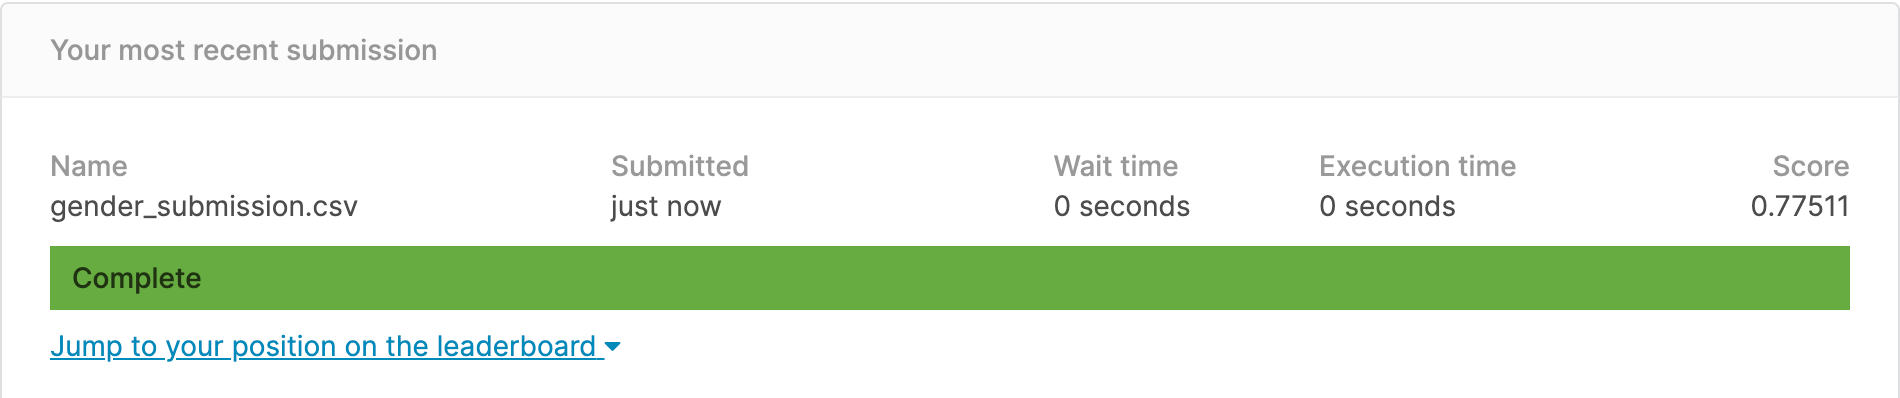

In [76]:
from IPython.display import Image
Image(filename='submission.jpg')

User ID: 5790945 
User Name: ceciliahu123 
Score:0.77511
Submission Date: Dec.4th


